<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/LogisticRegression/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

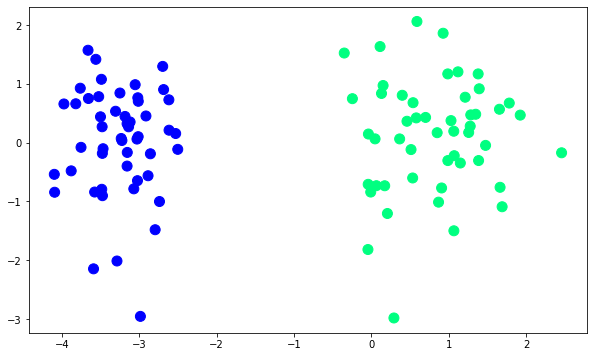

In [1]:
from sklearn.datasets import make_classification
import numpy as np



X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)


import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Perceptron Function

In [2]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1) # adding X0 column i.e. 1  
    weights = np.ones(X.shape[1]) # initial line where a = b = c = 1. or X1+X2+1=0
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100) # dot product to predict region. +ve if j>0, -ve otherwise
        y_hat = step(np.dot(X[j],weights))  # y_hat stores predicted label
        weights = weights + lr*(y[j]-y_hat)*X[j]  # calculating new weights with the formula
        
    return weights[0],weights[1:]
        

# Weight calculating formula

W<sub>new</sub> = W<sub>old</sub> - &#951;(y<sub>i</sub> - y&#770;<sub>i</sub>)X<sub>i</sub>

In [3]:
def step(z):
    return 1 if z>0 else 0

In [4]:
intercept_,coef_ = perceptron(X,y)

print(coef_)
print(intercept_)

[1.05343617 0.2221512 ]
1.3000000000000003


In [5]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [6]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

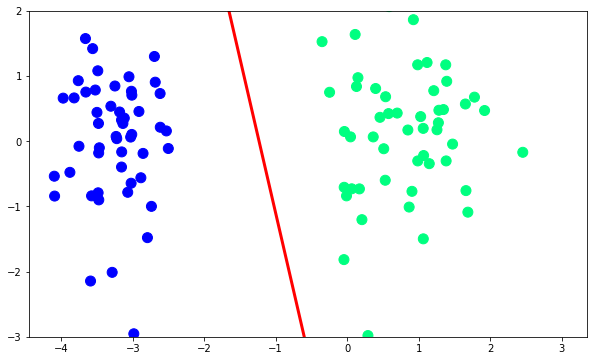

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [8]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(300):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [9]:
m,b = perceptron(X,y)

%matplotlib inline


from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]


ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)

plt.ylim(-3,3)


def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
plt.close()

In [10]:
from IPython.display import HTML

HTML(anim.to_html5_video())

In [11]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [12]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

(-3.0, 2.0)

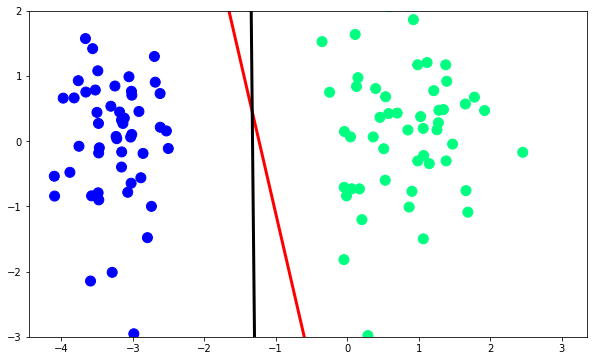

In [13]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)